In [22]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import json

In [8]:
sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [9]:
# Load the data
data = pd.read_csv('../output/preprocessed.csv')

In [10]:
len(data)

68544

In [ ]:
data['sentiment'] = sentiment_task(data['text'].tolist())

In [39]:
# Load the data from colab
data = pd.read_csv('../output/output.csv')

In [40]:
# Display the first few rows of the dataframe to verify the results
data[['text', 'sentiment']].head()

,text,sentiment
0,run business mean juggle countless administrat...,"{'label': 'positive', 'score': 0.7001867890357..."
1,z truss walk linger shadow predecessor charlat...,"{'label': 'negative', 'score': 0.7915598154067..."
2,uk brace war government building london raise ...,"{'label': 'neutral', 'score': 0.8010220527648926}"
3,marry second cousin remove taboo think genetic...,"{'label': 'neutral', 'score': 0.6054957509040833}"
4,t truly disgraceful indian national congress s...,"{'label': 'negative', 'score': 0.9314106106758..."


In [44]:
data['sentiment_label'] = data['sentiment'].apply(lambda x: eval(x)['label'])
data['sentiment_score'] = data['sentiment'].apply(lambda x: eval(x)['score'])
data = data.drop(columns=['sentiment'])

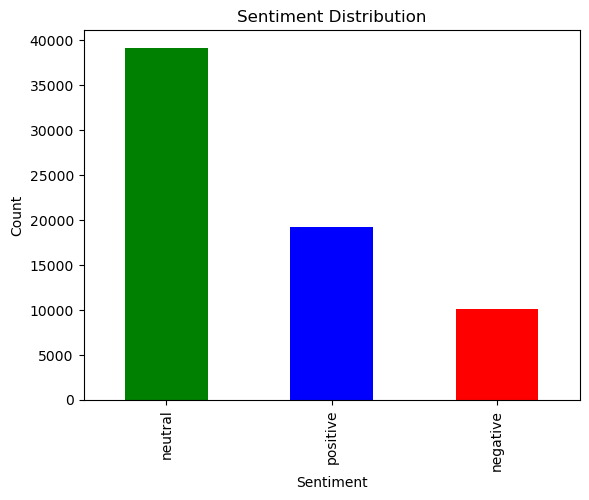

In [45]:
# Count the occurrences of each sentiment label
sentiment_counts = data['sentiment_label'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

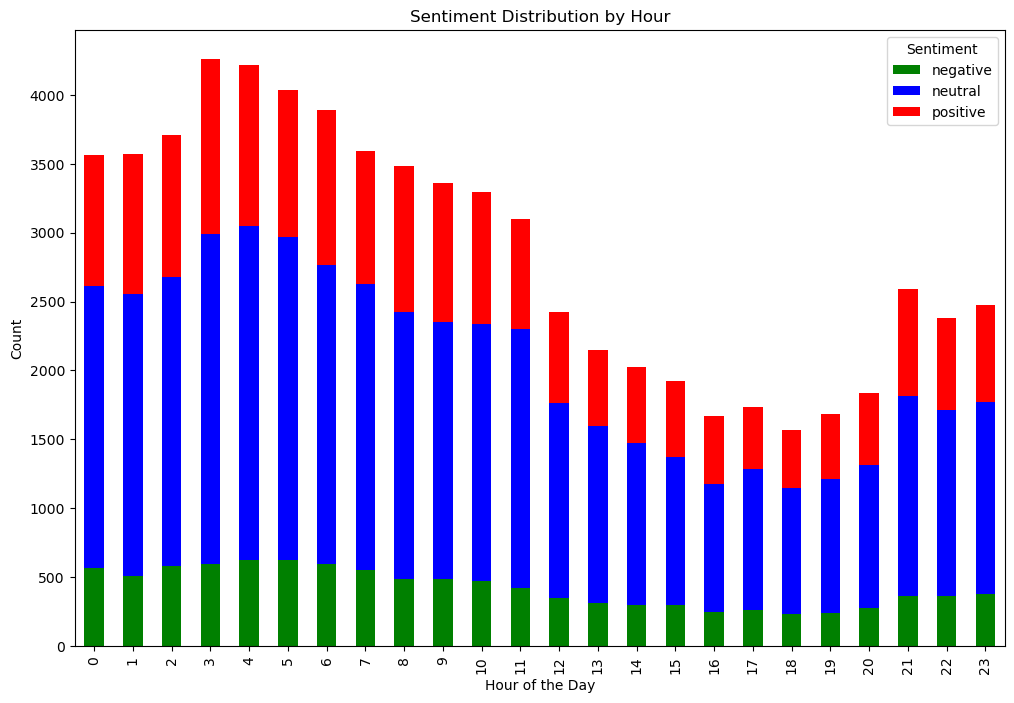

In [47]:
# Convert the timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S')

# Extract the hour from the timestamp
data['hour'] = data['timestamp'].dt.hour

# Group by hour and sentiment label, then count the occurrences
hourly_sentiment = data.groupby(['hour', 'sentiment_label']).size().unstack(fill_value=0)

# Plot the sentiment distribution by hour
hourly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'blue', 'red'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Hour')
plt.legend(title='Sentiment')
plt.show()

In [54]:
# Filter the negative posts
negative_posts = data[data['sentiment_label'] == 'negative']

# Sort by sentiment score in descending order
top_negative_posts = negative_posts.sort_values(by='sentiment_score', ascending=False).head(50)

pd.set_option('display.max_colwidth', None)
top_negative_posts.text

38742                                                            absolutely disgraceful behavior individual itsa shame disrespect political system embarrass disrespectfu
37688     lack respect professionalism current uk government truly disappointing essential cabinet minister uphold gravita dignity role ukpolitic governmentembarrassment
23415                                                              absolutely speechless late cabinet appointment itsa disaster wait happen god help cabinetappointmentfa
1390                                                               absolutely speechless late cabinet appointment itsa disaster wait happen god help cabinetappointmentfa
38877                                                          state uk politic government utterly disappointing generation let incompetence lie disappointment ukpolitic
31963                                                      disgusting public figure like nick ferrari bodyshame politician left right basic decency re